# **Predicting Employee Churn**

## Description and deliverables

This was my capstone project for the advanced data analytics course by Google. it gave me the opportunity to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

The deliverables for this project are; 
1. A Pace strategy document/Proposal
2. Executive summary
3. Code notebook
4. Model evaluation results, interpretation and visualizations


## This Project follows the PACE Strategy Workflow

## **PACE stages**

## P: Plan
## A: Analyze
## C: Construct
## E: Execute

## **Pace: Plan**

Here we considerd the questions in our PACE Strategy Document to reflect on the Plan stage.

In this stage, we considered the following question:
*  Who are our stakeholders for this project?
- What are we trying to solve or accomplish?
- What are our initial observations when you explore the data?
- What resources do we find ourself using as we complete this stage? ( included links.)
- Are there any ethical considerations in this stage?


### Understand the business scenario and problem

The HR department at Salifort Motors wanted to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, and wanted to derive insights from the data. So they consultated with our firm as data analytics professionals and asked us to provide data-driven suggestions based on our understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Our goals in this project were to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company and also find out, if they do leave, what could be responsible for their leaving.

If we are able to predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire and train new employees, increasing employee retention will be beneficial to the company.

### Understanding  the HR dataset

The dataset that was used for this project contained 15,000 rows and 10 columns for the variables listed below. 

**Note:** More information about the data can be found here [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [40]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For preprocessing
from sklearn.preprocessing import OneHotEncoder

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# For saving models
import pickle


### Load dataset

`Pandas` was used to read a in our dataset and preview the first few rows. 

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("C:/Users/mena/Desktop/salifort_motors/HR_Sailfort_dataset.csv")

# Display first few rows of the dataframe

df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)
Here we tried to:
- Understand our variables
- Clean our dataset (missing data, redundant data, duplicates, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data

df.shape

(14999, 10)

In [5]:
# Gather basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Gather basic information about the data

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, we renamed the columns as needed and standardized the column names so that they are all in `snake_case`, corrected column names that were misspelled, and made column names more concise as needed.

In [8]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed

df = df.rename(columns = {'time_spend_company' : 'tenure',
                            'Department' : 'department',
                            'Work_accident' : 'work_accident',
                            'average_montly_hours' : 'average_monthly_hours'})
# Display all column names after the update

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
df.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
duplicated = df[df.duplicated()]
duplicated.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [13]:
# Find percentage of the data that is duplicated

percentage_duplicate = (round(len(duplicated)/df.shape[0]*100, 2))
print('perdnetage of duplicates is:', percentage_duplicate)

perdnetage of duplicates is: 20.05


In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for columns with outliers in the data.

In [ ]:
# Loop through the dataset find columns with outliers.
def identify_outlier_columns(df, threshold=1.5):
    """
    Identifies columns with outliers in a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    threshold (float): The multiplier for the IQR to define outliers (default is 1.5).

    Returns:
    List[str]: A list of column names that contain outliers.
    """
    outlier_columns = []
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        
        if ((df1[column] < lower_bound) | (df[column] > upper_bound)).any():
            outlier_columns.append(column)
    
    return outlier_columns


outlier_columns = identify_outlier_columns(df)
print("Columns with outliers:", outlier_columns)

### Make Boxplot to visualize outliers

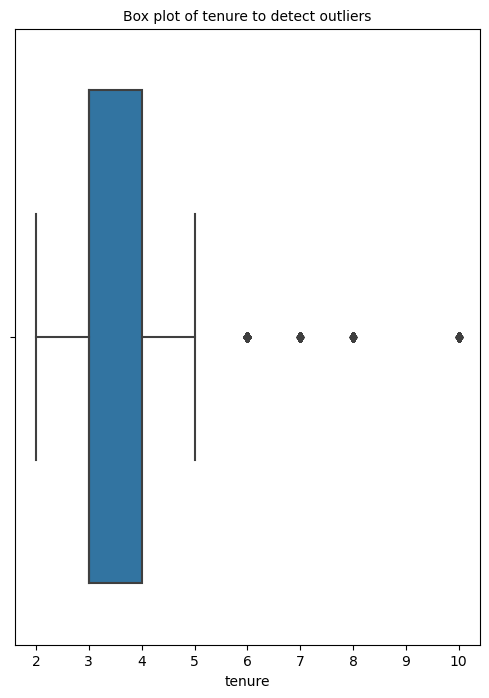

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize =(6,8))
plt.title('Box plot of tenure to detect outliers', fontsize = 10)
sns.boxplot(x=df1['tenure'])
plt.show()

In [16]:
# Determine the number of rows containing outliers

# first we define the variaous percentile levels, 25th and 75th
# define the 25th percentile
percentile25 = df1['tenure'].quantile(0.25)

#define the 75th percentile

percentile75 = df1['tenure'].quantile(0.75)

# find the interquatile range IQR

iqr = percentile75 - percentile25

# Next we define the lower and upper limits, any values below or above these limits are considered outliers

lower_limit = percentile25 - 1.5*iqr

upper_limit = percentile75 + 1.5*iqr

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print(lower_limit)
print(upper_limit)
print('number of outliers is', len(outliers))

1.5
5.5
number of outliers is 824


## Initial EDA Summary

From the initail EDA the following can be deduced;

1. The dataset contains 15,000 rows, and 10 columns, nil missing values and about 20% of the dataset are duplicates same was droped.

2. The data set contains the following columns and data types; 
**Column Name**    |**Data Type**
------|------
satisfaction_level|float64
last_evaluation|float64
number_project|int64
average_montly_hours|int64
time_spend_company|int64
Work_accident|int64
left|int64
promotion_last_5years|int64
Department|object
salary|object

Important to note is that there are object type variables in the data which were converted to numeric data form to allow for more efficient manipulation.

3. The column names were not uniform, same was corrected, all column format made uniform by applying the snake_case format to all the column heads and spelling mistakes were corrected.

4. Outliers in the dataset were identified using a function that applied calculated upper and lower limit values, and the outliers were removed from the resulting variables. This is imprtant as certain models are more sensitive to outliers than others and these outliers may need to be removed depending on our choice of model.

# pAce: Analyze Stage
Here we Performed EDA (analyze relationships between variables) and the questions we reflected upon included;

- What were the relationships between variables?
- What were the distributions in the data?
- What transformations were made to the data? And why 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Were there any ethical considerations at this stage?



## Step 2. Data Exploration (Continue EDA)

We began by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed

df1['left'].value_counts()

# Get percentages of people who left vs. stayed

df1['left'].value_counts(normalize = True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

Now, we examine variables that we're interested in, and create plots to visualize relationships between variables in the data.

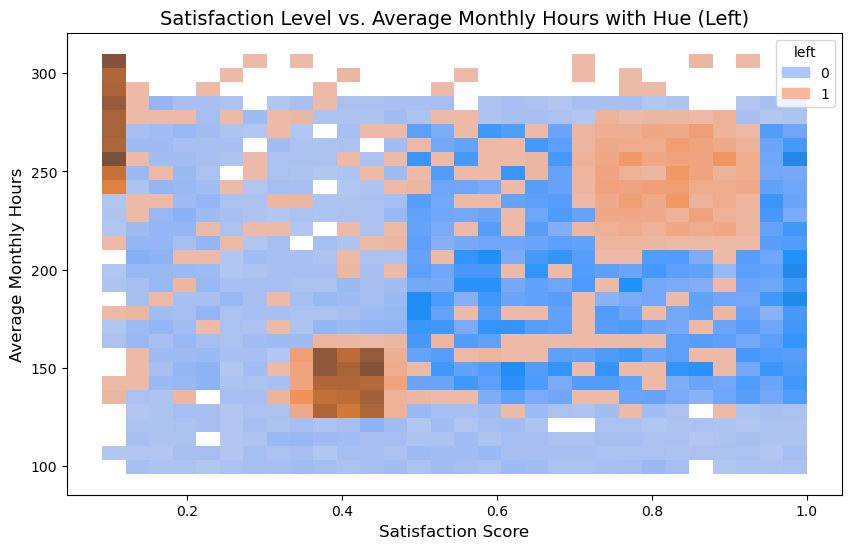

In [18]:
# first we examine satisfaction vs hours worked and how they affected those that left the company

plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='satisfaction_level', y='average_monthly_hours', hue='left', bins=30, palette='coolwarm')

# Setting the axis limits
#plt.xlim(0.01, 1)
#plt.ylim(90, 310)

# Adding labels and title
plt.title('Satisfaction Level vs. Average Monthly Hours with Hue (Left)', fontsize=14)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)

# Display the plot
plt.show()


From our plot above, we tried to compare average monthly hours and satisfaction level and how these two affected those that left or stayed. 

From the plot, we see how average hours worked monthly and satisfaction influenced leaving or staying, even though the plot looked unusual, some deductions could still be made;

Everone that worked 100hours and below stayed, irrespective of their level of satisfaction, this could be due to the flexibility that working a fewer hours offered such employees.

Of those that had the highest level of satifaction, close to 1, none of them left, although non of them also worked up to 300hours. Inessence if employees are very satisfied with the company, they stayed not minding how much work they did.

Those that worked significantly more had the least satisfaction, and all of them left, it is not clear though weather their dissatisfaction was due to them being overworked and burning out or other reasons such as low level of satisfaction with the job or company or poor compensation.

All those who worked 300hours and above left, this may be attributed to them being overworked.

In conclusion, satisfaction level as well as average number hours worked seem to be good indicators of the employees leaving or staying. And finding ways to improve the level of satisfaction and regualting the number of hours worked might be worth investing in. 

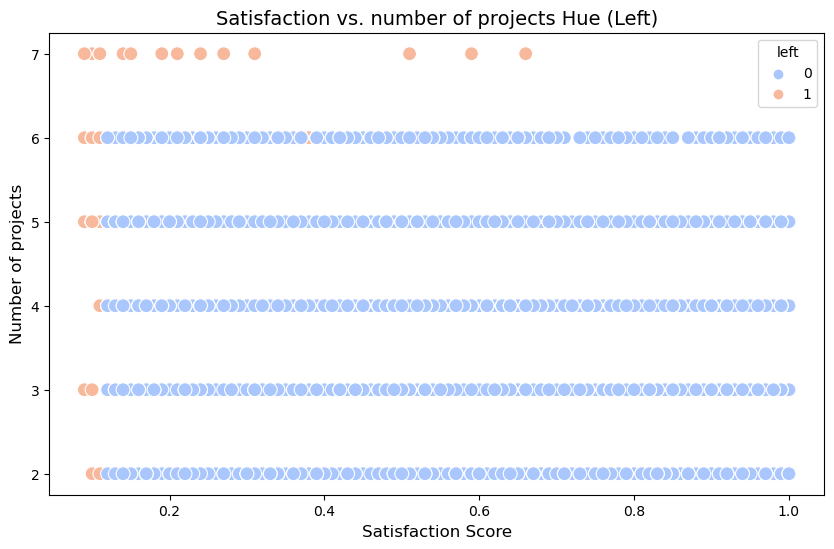

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='satisfaction_level', y='number_project', hue='left', palette='coolwarm', s=100)

# Setting the axis limits
#plt.xlim(0.01, 1)
#plt.ylim(90, 310)

# Adding labels and title
plt.title('Satisfaction vs. number of projects Hue (Left)', fontsize=14)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)

# Display the plot
plt.show()

From the plot;

1. The plot also appears strange and there is no pattern or clear correlation beween the two.

2. Everyone that worked on 7 projects left the company, irrespective of their level of satisfaction although none of them had a satisfaction score of upto 0.7

3. Also, all the least satisfied employees in all project categories left,thats irrespective of the number of projects worked on.

4. it could be deduced that, those who worked on more projects, also worked longer hours, and at the end probaly were burnout and irrespedtive of how satisfied they were, they felt about the company or the projects still left

Conparing the level of satisfaction among those that left and those that stayed

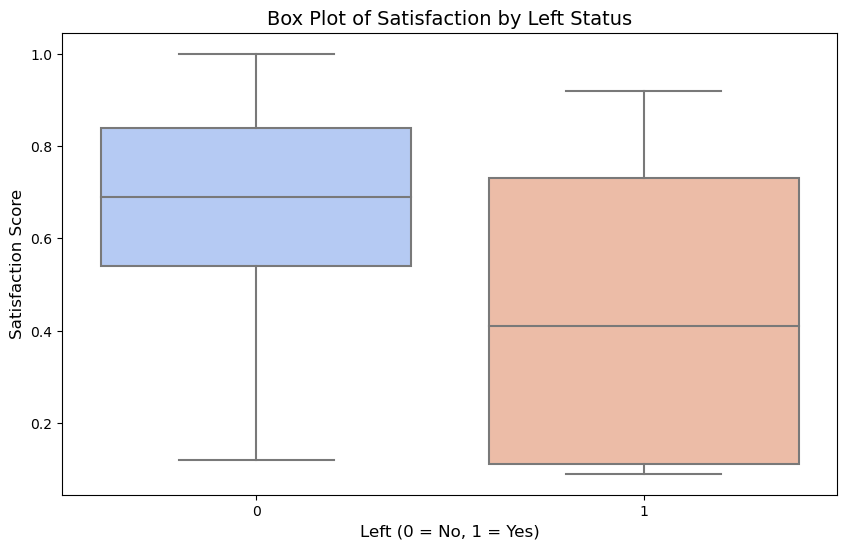

In [20]:
# Box Plot of Satisfaction by Left Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='left', y='satisfaction_level', palette='coolwarm')

# Adding labels and title
plt.title('Box Plot of Satisfaction by Left Status', fontsize=14)
plt.xlabel('Left (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=12)

# Display the plot
plt.show()


From the boxplot above;

Those employees that stayed had a higher mean satisfaction score, compared to those who left. This is demonstrated by the table below

Satisfaction played a role in determining who left or stayed however, satisfaction along with number of hours and projects done could be good indicators of leaving or staying.

In [21]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


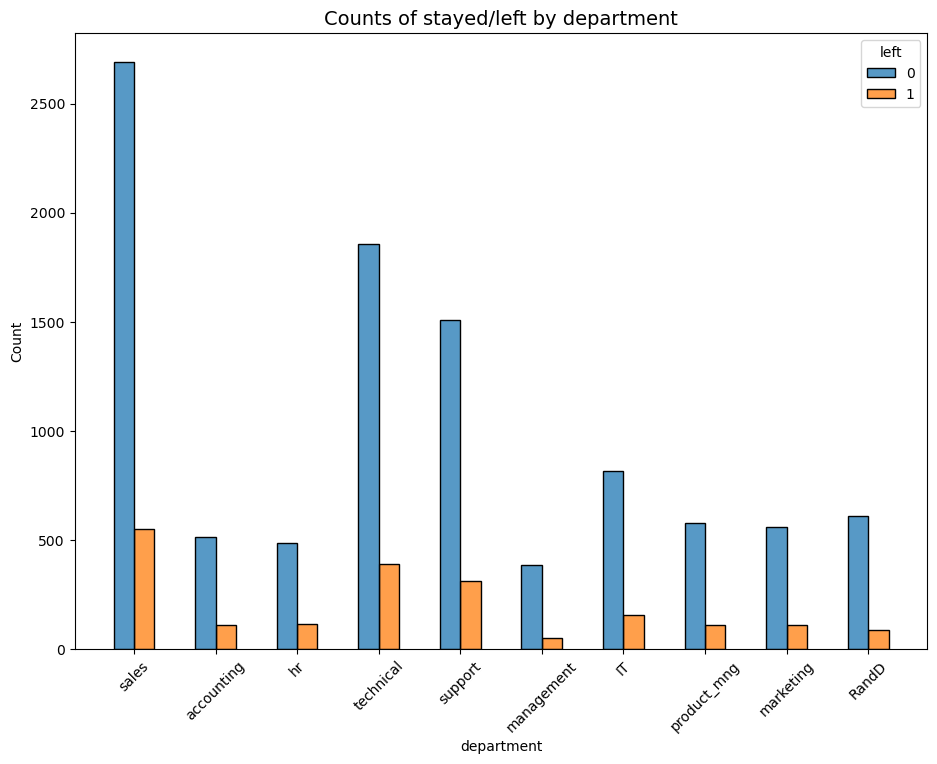

In [22]:
# Lets visualize the number of people that left vs stayed by department

plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=True, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);


From our graph above, the following could be inferred;

1. Churn was highest in the sales, technical and support departments and least in the management, RandD and accounting departments respectively. 

2. Its important to note however, that the department with the highest churn also had the highest number of employees. For instances, sales is probably one of the most demanding departments as there are always difficult targets, if this is coupled with low pay and poor motivation, it may drive turnover of employee. 

3. Thus, management may consider ways of improving wellfare of sales employees as well as others, there are a lot of ways to achieve this, including percentage compensation at certain thresh holds of product sales.

4. There were less churn at the level of management, this was expected as it is comprised of the decision making unit of the compabny and probaly the best paid as well.

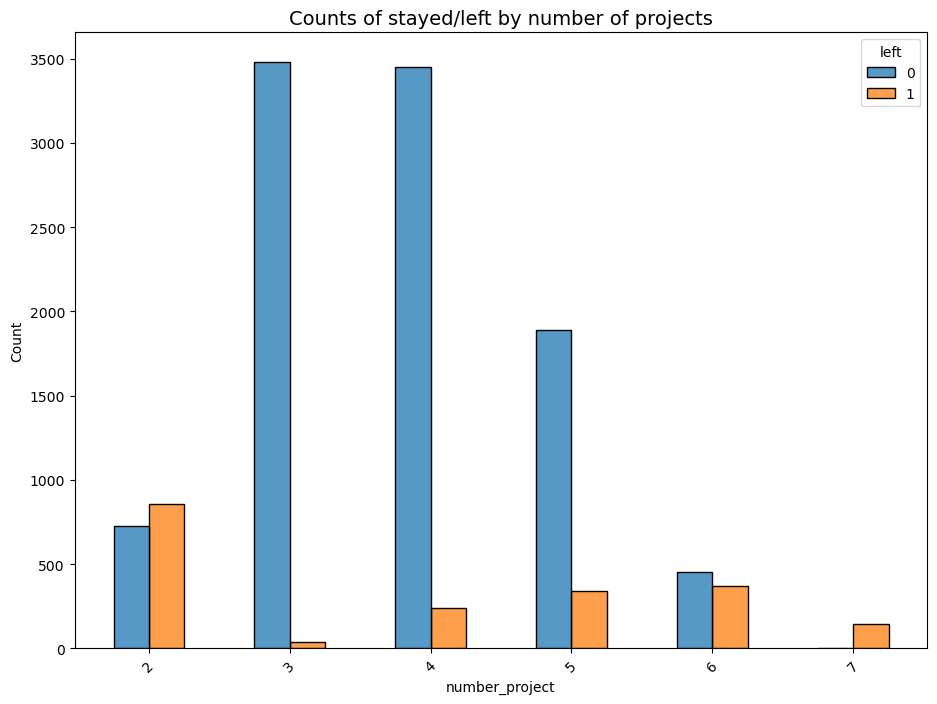

In [23]:
# Counts of stayed/left by number of projects

plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='number_project', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by number of projects', fontsize=14);

**The plot above compares the count of those that left and stayed by the number of projects they were involved in, and the following deductions can be made;**

1. Those that worked around the mean/median number of projects and 1 standard deviation away from this were the least likely to leave.

2. As the number of projects increases to the right and decreases to the left, the number of those who left also increased. An increase to the right(increase in the number of projects), could indicate discontent from the bornout of being involved in too many projects that the employee could possibly handle effectively. While on the other hand as the number of projects decreased to the left we also saw a sharp increases in the number of those that left, here some scenerios come to mind; a. could it be that these category were not given enough tasks because they were new and still trying to familiarize with the company procedures, b. Were they always unable to meet targets resulting in less trust and subsequently a reduction in the number of projects asigned to them. c. Or were they already on their way out of the company?

3. All those that worked on 7 projects all left

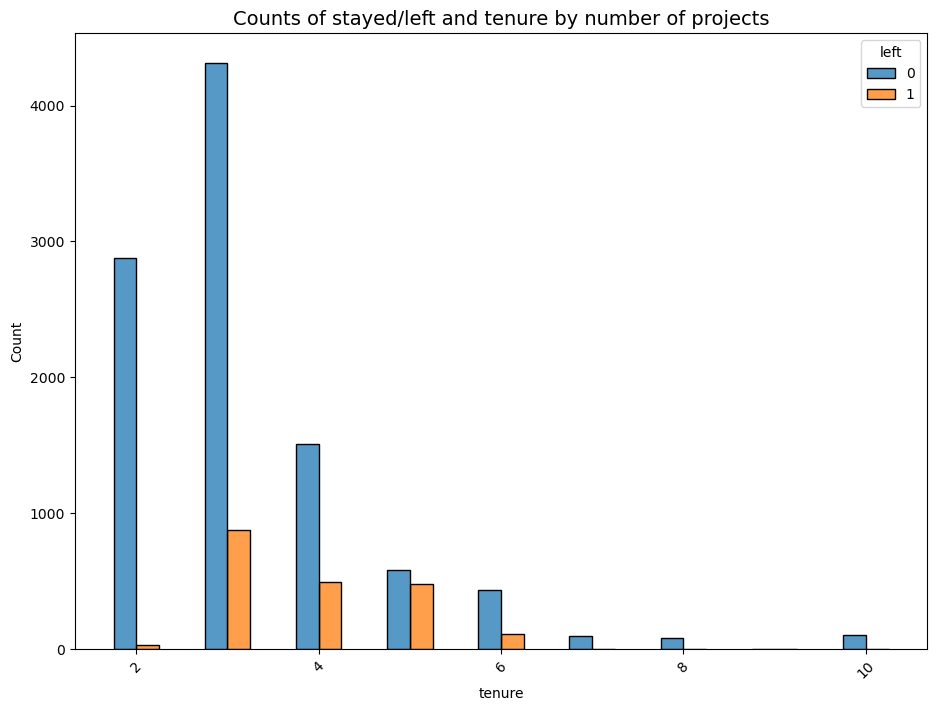

In [24]:
# PLot of stayed/left and tenure by number of projects
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='tenure', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left and tenure by number of projects', fontsize=14);


From our plot above;

1. It is clear that no employee who has worked for more than 6yrs left the company. This could be explained by a number of factors; a. Loyalty factor, b. Job satisfaction, c. Good renumeration d. Carear progression. This could also represent outliers in our dataset.

2. A high proportion of those who stayed were from the management department, about 14% compared to sales for instance with only 3% staying past the 6 year mark. Again this likely down to pay as is conformed below

3. Majority of those who stayed, about 73% belonged to the medium and high salary class, in essence, the higher the salary the higher the likelihood of staying.

In [25]:
# Before we proceed with model building, we will need to convert the object type data columns to numeric 
# and also remove the outliers in the tenure column

# Remove the outliers from the tenure variable

df1 = df1[(df1['tenure'] >= lower_limit) & (df1['tenure'] <= upper_limit)]


## Feature Engineering

In [26]:
# to encode the salary column, we use the categolrical emcoding which is similar to the mapping method but while mapping offers 
# simplicity, categorical encoding offers flexibility in handling categorical data and reordering variable categories
# Both of these methods are preferred to onehot encoding for data that has an inherent order as in the case of salary
# OneHot encoding assumes independence among the various groups and encodes them as independent variables

# encode salary column;

df1['salary'] = (
    df1['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

In [27]:
# Initialize the OneHotEncoder with drop='first' to avoid the dummy variable trap
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the 'department' column
encoded_department = encoder.fit_transform(df1[['department']])

# Create a DataFrame with the encoded columns, ensuring the index matches df1
encoded_department_df = pd.DataFrame(encoded_department, columns=encoder.get_feature_names_out(['department']), index=df1.index)

# Drop the original 'department' column
df1 = df1.drop('department', axis=1)

# Concatenate the new one-hot encoded columns with df1
df1 = pd.concat([df1, encoded_department_df], axis=1)

In [50]:
# Dummy encode the `department` column
#df1 = pd.get_dummies(df1, drop_first=False)

In [ ]:
# next we encode the department, ensure to retain the index of the dataframe to avoid generating NAN values.

# One-hot encode the department columns
#department_cols = [col for col in df.columns if col.startswith('department_')]
#encoder = OneHotEncoder(drop='first', sparse=False)
#encoded_department_df = pd.DataFrame(encoded_department, columns=encoder.get_feature_names(department_cols), index=df.index)

# Drop the original department columns and concatenate the new one-hot encoded columns
#df = df.drop(columns=department_cols)
#df = pd.concat([df, encoded_department_df], axis=1)

In [28]:
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.10,0.77,6,247,4,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.92,0.85,5,259,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.89,1.00,5,224,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.42,0.53,2,142,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.45,0.54,2,135,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
df1.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                       int8
department_RandD          float64
department_accounting     float64
department_hr             float64
department_management     float64
department_marketing      float64
department_product_mng    float64
department_sales          float64
department_support        float64
department_technical      float64
dtype: object

In [30]:
import sklearn
print(sklearn.__version__)

1.1.1


In [31]:
# we check to ensure that our changes has not created any null values

df1.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
tenure                    0
work_accident             0
left                      0
promotion_last_5years     0
salary                    0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
dtype: int64

In [32]:
# Preview the first few rows of our new dataset

df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.10,0.77,6,247,4,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.92,0.85,5,259,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.89,1.00,5,224,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.42,0.53,2,142,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.45,0.54,2,135,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## paCe: Construct Stage

**At this stage, we:**
- Determined which models are most appropriate
- Constructed the models
- Confirmed model assumptions
- Evaluate model results to determine how well our models fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

## Modeling

Before we building our model, we plot a correlation heatmap to assess that there is no multicollinearity among the X variables

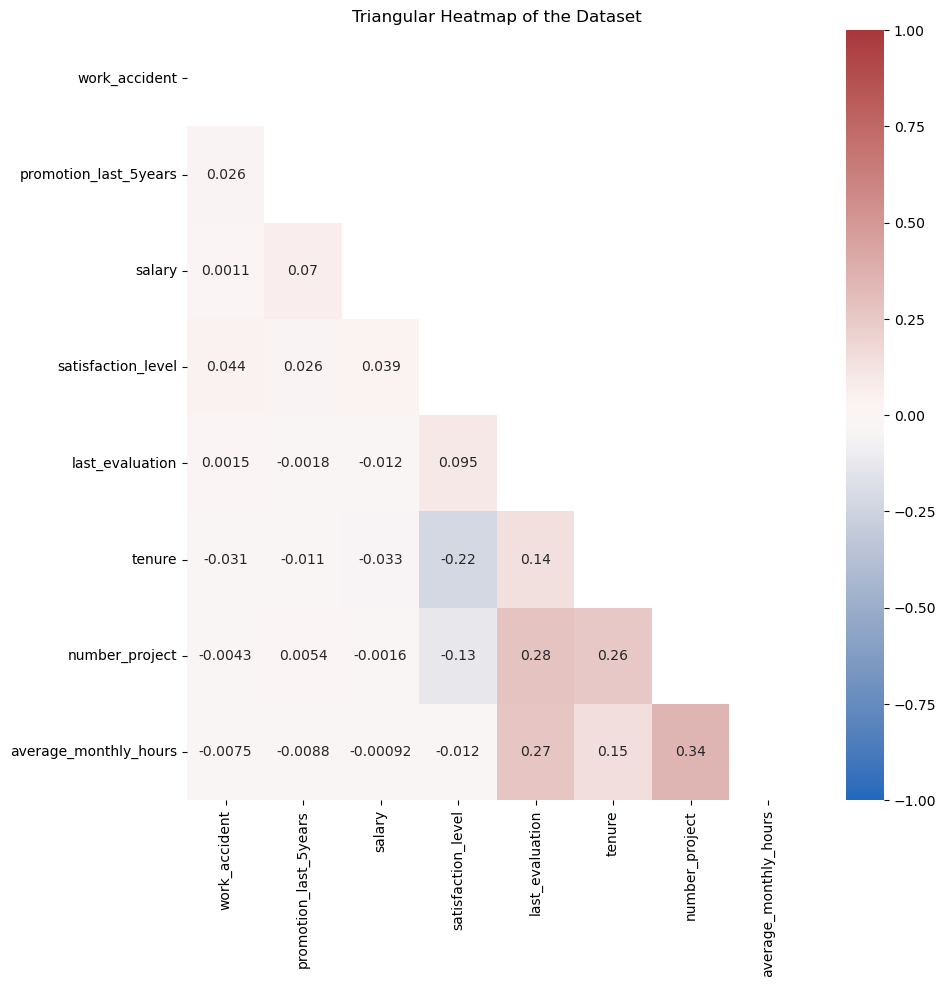

In [33]:
# Plot correlation heat map, to rule out multicolinearity among the predictor variables

# calculate the correlation coefficients 
corr = df1[['work_accident','promotion_last_5years','salary','satisfaction_level','last_evaluation','tenure','number_project','average_monthly_hours']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1, center=0)

plt.title('Triangular Heatmap of the Dataset')
plt.show()

From our heatmap, there were no variables that were highly correlated.

So proceeded to biuld our models, which will predict those that will leave the company and those that will not.

For this particular projet, we built a series of models and assessed their performance.
The models built were;
1. Logistic regression 
2. Decision Tree
3. Random forest
4. XGboost: On a separate notebook

### Model Building

### Model 1: Logistic Regression

In [34]:
# First we start by building a logistic regression model

# Isolate the dependent or output variable and then select the desired predictor variables

y = df1['left']

X = df1.drop('left', axis = 1)

In [35]:
# Next we split the dataset into traiing and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 42)

In [37]:
# Then we instantiate our model and fit it the the train dataset
# we can also asign a random state for reproducibility and a max_iter function to allow for enough iterations for convergence 
# to occur

clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

In [38]:
# Then we can try to predict the values of y given X following the models training on the test datasets

y_pred = clf.predict(X_test)

In [42]:
# we can then assess the various metrics of our logistic regression model

print('Accuracy score:', "%.6f"%metrics.accuracy_score(y_pred, y_test))
print('Precision score:', "%.6f"%metrics.precision_score(y_test, y_pred))
print('Recall score:', "%.6f"%metrics.recall_score(y_test, y_pred))
print('F1 score:', "%.6f"%metrics.f1_score(y_test, y_pred))
print("ROC AUC Score:", "%.6f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy score: 0.820201
Precision score: 0.444444
Recall score: 0.263270
F1 score: 0.330667
ROC AUC Score: 0.598244


In [45]:
# we can also print out a more detailed report of our model's metrics

target_names = ('Predicted would not leave', 'Predicted would leave')
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



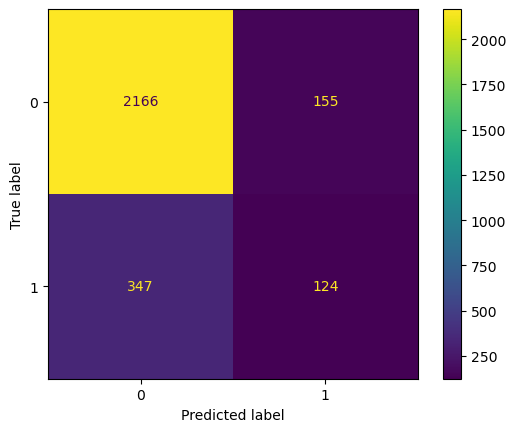

In [49]:
# plot a confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

### Model 2: Decision Tree Classifier

In [52]:
# To avaoid confusion and mix up, we copy our dataframe to a new variable df_dt

df_dt = df1.copy()

In [53]:
#preview data

df_dt.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.10,0.77,6,247,4,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.92,0.85,5,259,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.89,1.00,5,224,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.42,0.53,2,142,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.45,0.54,2,135,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
# Just like we did for the logistic regression model 
# we go ahead and isolate the dependent or output variable and then select the desired predictor variables

y = df_dt['left']

X = df_dt.drop('left', axis = 1)

In [55]:
# We also plit the data as we did earlier.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Next we proceed to build a decision tree model

In [56]:
# First we can build a plain decision tree witout tuning;

'''
An untuned decision tree uses the default parameters provided by the machine learning library (e.g., scikit-learn). 
These default parameters might not be optimal for the specific dataset, leading to potential issues such as;

1. Overfitting: Often leads to overfitting because the tree can grow very deep and complex, 
capturing noise in the training data.
2. Variance: High variance, meaning its performance may vary significantly with different datasets 
or even different train-test splits of the same dataset.
However; It may have low bias if it fits the training data very well, but this can come at the cost of high variance.

Characteristics:
Default Parameters: It uses default parameters such as:
1. max_depth: None (the tree is expanded until all leaves are pure or contain less than min_samples_split samples)
2. min_samples_split: 2
3. min_samples_leaf: 1
4. max_features: None (all features are considered for splitting)
5. criterion: "gini" (for classification)

'''
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [57]:
# Print out the metrics of the untuned decision tree model 
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))
print("ROC AUC Score:", "%.6f" % metrics.roc_auc_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.972421
Precision: 0.905350
Recall: 0.934183
F1 Score: 0.919540
ROC AUC Score: 0.957182


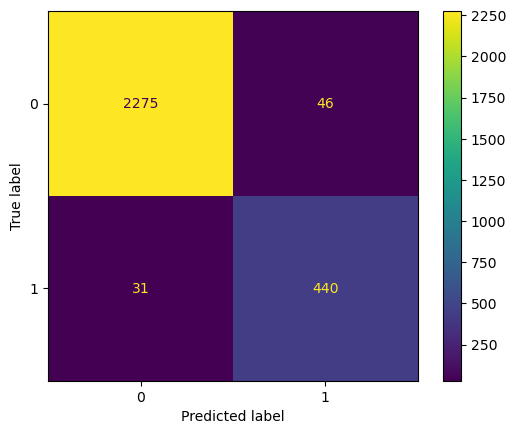

In [58]:
# Plot a confusion matrix diagram

cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

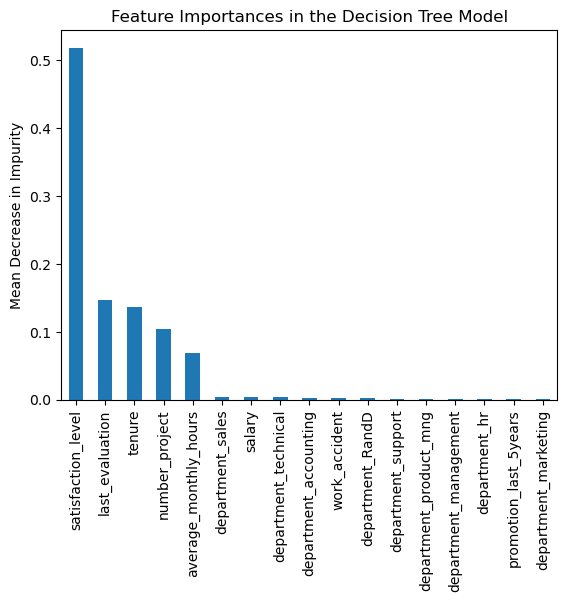

In [59]:
# Calculate feature importances
importances = decision_tree.feature_importances_

# Create a Series with feature importances
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances in the Decision Tree Model")
ax.set_ylabel("Mean Decrease in Impurity")
plt.show()

Next we build a tuned decision tree model

In [60]:
# next we build a tuned decision tree with select hyperparameters
'''
A tuned decision tree is one where hyperparameters have been adjusted to optimize performance on the validation set 
or through cross-validation.

NB: 
- Cross-validation is more rigorous and makes more efficient use of the data, and its particularly useful for smaller datasets
- While validation with a separate datasetis less compuationally expensive and works best with very large dataset.
We will be using cross-validation for our tree-based models.
'''

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tuned_dtree = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Next we fit the model to the training data

In [61]:
%%time
tuned_dtree.fit(X_train, y_train)

CPU times: total: 3.92 s
Wall time: 3.93 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'recall', 'f1', 'roc_auc'})

Identify the optimal values for the decision tree

In [63]:
# Check best parameters
tuned_dtree.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [65]:
# Check best AUC score on CV
tuned_dtree.best_score_

0.9741265306913758

Next, we write a function that will help extract all the scores from the grid search. 

In [66]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

We can now use the function defined above to retrieve all the scores from grid search.

In [68]:
# Get all CV scores
tuned_dtree_cv_results = make_results('decision tree cv', tuned_dtree, 'auc')
tuned_dtree_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.95541,0.912133,0.933245,0.97803,0.974127


### Decision Tree Result Summary

### Model 3: Random Forest Model

In [69]:
# Before we proceed, we also copy the data to a new variable.

df_rf = df1.copy()

In [70]:
df_rf.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.10,0.77,6,247,4,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.92,0.85,5,259,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.89,1.00,5,224,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.42,0.53,2,142,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.45,0.54,2,135,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
 # we go ahead and isolate the dependent or output variable and then select the desired predictor variables

y = df_rf['left']

X = df_rf.drop('left', axis = 1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [73]:
# W then proceed to build a random forest model, we start by;
# Instantiating the model

rf = RandomForestClassifier(random_state=0)

# Then we assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [74]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: total: 23min 7s
Wall time: 23min 29s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'recall', 'f1', 'roc_auc'})

We use Pickle to save fit model object and avoid having to refit the model when for any reason analysis is interrupted.
This saves times, as we know, in some instances it takes a lot of time to fit the model and we dont want to waste time refitting models. 

To begin, 
1. We specify a path to save our model
2. Define a function to pickle the model 
3. Define a function to read the model
4. Use the functions defined above to save the model in a pickle file and then read it in

In [94]:
import os

def write_pickle(path, model_object, save_as):
    # Combine the directory path and the file name to create the full file path
    file_path = os.path.join(path, save_as)
    
    # Open the file in write-binary ('wb') mode and write the model object to the file
    with open(file_path, 'wb') as to_write:
        pickle.dump(rf1, to_write)

def read_pickle(path, saved_model_name):
    # Combine the directory path and the file name to create the full file path
    file_path = os.path.join(path, saved_model_name)
    
    # Open the file in read-binary ('rb') mode and read the model object from the file
    with open(file_path, 'rb') as to_read:
        model = pickle.load(to_read)
    
    return model

In [95]:
# Lets define the path and name of our file
path = 'C:/Users/mena/Desktop/salifort_motors/'  # Directory path
save_as = 'hr_rf_cv.pickle'  # File name

In [96]:
# Write the model object to the pickle file
write_pickle(path, rf1, save_as)

In [97]:
# Read the model object from the pickle file
rf1 = read_pickle(path, save_as)

Identify the best AUC score achieved by the random forest model on the training set.

In [98]:
# Check best AUC score on CV
rf1.best_score_

0.9817936779007908

Identify the optimal values for the parameters of the random forest model.

In [99]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [101]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tuned_dtree_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv    0.95541  0.912133  0.933245   0.97803  0.974127
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.970663  0.915678  0.942318  0.981135  0.981794


Define a function that gets all the scores from a model's predictions.

In [102]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [103]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.967033,0.934183,0.950324,0.983524,0.96386


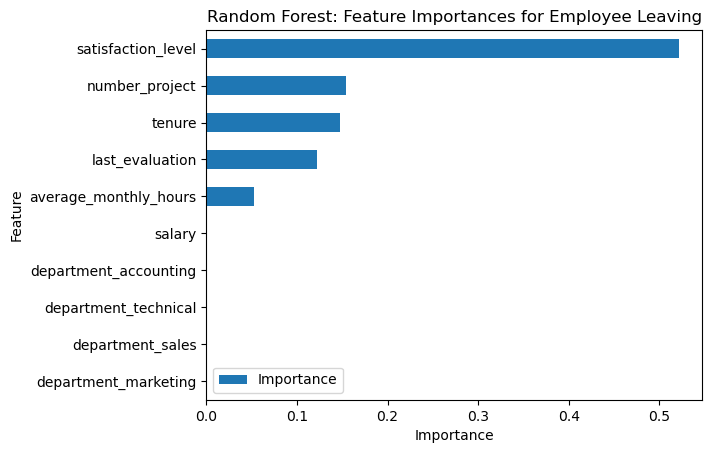

In [108]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set, also othe test set other metrics were very poor with an f1_score of 33%, precision score of 44% and recall score of 26%. The logistic regression model was particularly poor for this task.

**Tree-based Machine Learning**

The decision tree showed significant improvements in the results  obtained from the logistic regression model and the random forest model proved to be even better than the decision tree model.

Conclusion, Recommendations, Next Steps
The models and the feature importances extracted from the models confirm that employees at the company are overworked and most of the employees who left were not very satisfied with the company, although it was not clear if there dissatisfaction was from long hours of work or high number of projects as there was no linear relationship between leaving and both variables.

The following recommendations were presented to the stakeholders to retain employess:

1. Cap the number of projects that employees can work on. This inturn may reduce the number of hours the employees have to work, reduce burnout and probably improve their job satisfaction since they will now have more time for other important things in their lives.

2. Ensure that loyalty and hardwork is rewarded appropriately especially with respect to promotion of deserving employees and review of renumeration as may be required.

3. If employees must work for very long hours beyond the company's established average requirement, the should be compensated appropriately or such long hours of work should be avoided. The task could be spread to involve more employees.

4. If the company does not have an overtime policy it should develop one, if otherwise employees should be properly informed of same. The company should also be clear on the expectations in terms of workload and time off.

5. There should unhindered communication between management and employees at all levels, this can be achieved through regular meetings at all levels.
